In [1]:
using Pkg
Pkg.activate("/Users/ryansenne/Documents/Github/SSM/")
# Pkg.activate("/home/ryansenne/PycharmProjects/ssm_julia/")

  Activating project at `\Users\ryansenne\Documents\Github\SSM`


In [2]:
include("/Users/ryansenne/Documents/Github/SSM//src/SSM.jl")
# include("/home/ryansenne/PycharmProjects/ssm_julia/src/SSM.jl")
using Random
using .SSM
using Distributions

### Gaussian GLM Example

In [3]:
# Fit a Gaussian GLM
# Generate some synthetic data
X = rand(10000, 3);  # 100 samples, 3 features;
# Add a column of ones to represent the intercept term
X_concat = hcat(ones(10000), X)
β = [2, 3, -4, 5]
y = X_concat * β + rand(Normal(0, 1), 10000)

# define a GLM
glm = GaussianRegression(X, y)
fit!(glm, 1000)

4-element Vector{Float64}:
  1.9935233218458142
  3.050294509792673
 -4.048610080939874
  5.009218701637457

### Poisson GLM Example

In [4]:
# Fit a Poisson GLM
# Generate some synthetic data
X = rand(10000, 3);  # 100 samples, 3 features;
# Add a column of ones to represent the intercept term
X_concat = hcat(ones(10000), X)
β = [2, 3, -4, 5]

# Generate some synthetic data
y = Vector{Float64}(rand.(Poisson.(exp.(X_concat * β))))

# define a GLM
glm = PoissonRegression(X, y)
fit!(glm, 1000)


4-element Vector{Float64}:
  1.9972876910665238
  3.0018761978448465
 -4.001568346180793
  5.002617122785103

### Binomial GLM Example (i.e. logistic regression)

In [5]:
# sigmoid function
function sigmoid(x)
    return 1 / (1 + exp(-x))
end

# Fit a Binomial GLM
# Generate some synthetic data
X = rand(10000, 3); # 1000 samples, 3 features;
# Add a column of ones to represent the intercept term
X_concat = hcat(ones(10000), X)
β = [2, 3, -4, 5]

# Generate some synthetic data
y = Vector{Float64}(rand.(Binomial.(1, sigmoid.(X_concat * β))))

# define a GLM
glm = BinomialRegression(X, y)
fit!(glm, 1000)

4-element Vector{Float64}:
  1.8543376890605436
  2.8784175544811696
 -3.917422980528167
  5.359082820186336

In [6]:
# try out markov glm

# Generate synthetic data from two distinct regimes
X = rand(100, 3); # 1000 samples, 3 features;
# Add a column of ones to represent the intercept term
X_concat = hcat(ones(100), X)
β₁ = [-20, -30, -40, 50]
β₂ = [6, 7, 8, -9]

# Generate some synthetic data
y₁ = X_concat * β₁ + rand(Normal(0, 0.1), 100)
y₂ = X_concat * β₂ + rand(Normal(0, 1), 100)

# concatenate X1 and X2
x = vcat(X, X)

# concatenate y1 and y2
y = vcat(y₁, y₂)

# define a Gaussian HMMGLM
glm = GaussianMarkovRegression(y, x, 2)

MarkovRegressionEM(glm)

Iteration: 1, Log-likelihood: -897.7454354160104
Iteration: 2, Log-likelihood: -895.2961750860343
Iteration: 3, Log-likelihood: -893.6462894856578
Iteration: 4, Log-likelihood: -891.7947146805982
Iteration: 5, Log-likelihood: -889.5159379589688
Iteration: 6, Log-likelihood: -886.5591061268444
Iteration: 7, Log-likelihood: -882.5078068760622
Iteration: 8, Log-likelihood: -876.6783902184586
Iteration: 9, Log-likelihood: -868.2026625661098
Iteration: 10, Log-likelihood: -857.2197663292588
Iteration: 11, Log-likelihood: -847.3246928056542
Iteration: 12, Log-likelihood: -841.4140915257459
Iteration: 13, Log-likelihood: -837.7678673596643
Iteration: 14, Log-likelihood: -835.4060360597952
Iteration: 15, Log-likelihood: -834.0549280656988


Iteration: 16, Log-likelihood: -833.4060348056876
Iteration: 17, Log-likelihood: -833.1279456194195
Iteration: 18, Log-likelihood: -833.0126298726145
Iteration: 19, Log-likelihood: -832.9645712744963
Convergence reached at iteration 19
Initial Variance: [923.1769837312262, 832.1561329691751]
Initial Transition Matrix: [0.9345794392523364 0.06542056074766354; 0.08695652173913043 0.9130434782608695]
Initial Mixing Coefficients: [0.54, 0.46]


Log-likelihood at iteration 1: -164784.8242617549
Log-likelihood at iteration 2: -159910.730898384
Log-likelihood at iteration 3: -159910.73170259935
Log-likelihood at iteration 4: -159910.73170316324


In [7]:
glm.σ²

2-element Vector{Float64}:
 464.7420540985162
 464.7424856293514

In [5]:
glm.A

2×2 Matrix{Float64}:
 0.984925  0.0150749
 0.485997  0.514003

In [6]:
glm.B[1].regression_model.β

4-element Vector{Float64}:
  -6.558491285299669
  -9.379005131558179
 -17.952620437344105
  19.36922317360324

In [18]:
SSM.forward(glm, y)

2×200 Matrix{Float64}:
 -48174.9  -96046.0  -1.44067e5  …  -9.50833e6  -9.55635e6  -9.60437e6
 -48021.9  -96043.8  -1.44066e5     -9.50833e6  -9.55635e6  -9.60437e6

In [8]:
glm.πₖ

2-element Vector{Float64}:
 0.49999997907667854
 0.5000000209233215

In [4]:
α, β =  SSM.EStep(glm)

([-833.8930048706336 -1664.630096902026 … -164893.8751923183 -165722.44966378057; -829.1198425249702 -1657.6934357887844 … -164886.86430569817 -165715.43877716045], [-164888.46086782028 -164059.886396358 … -830.6486430690045 0.0; -164886.31902531753 -164057.74455385524 … -828.5736831114416 0.0])

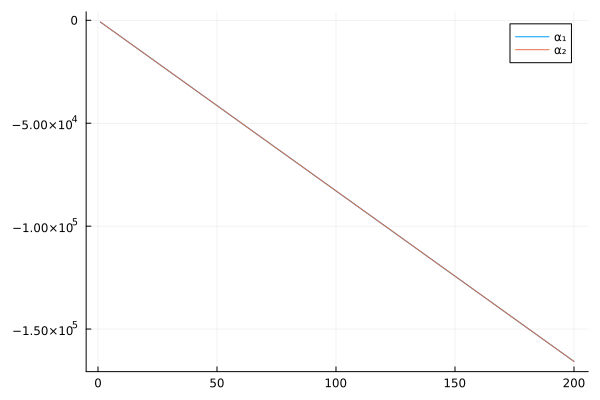

In [9]:
using Plots
plot(α[1, :], label="α₁")
plot!(α[2, :], label="α₂")

In [10]:
α

2×200 Matrix{Float64}:
 -833.893  -1664.63  -2493.28  …  -1.64065e5  -1.64894e5  -1.65722e5
 -829.12   -1657.69  -2486.27     -1.64058e5  -1.64887e5  -1.65715e5